<a href="https://colab.research.google.com/github/didulanthaisuru/nbeatsx/blob/main/n_beatsx_version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
sample_data_path = '/content/drive/MyDrive/Colab Notebooks'
files=os.listdir(sample_data_path)
print(files)

Mounted at /content/drive
['lstm.ipynb', 'cluster3_payments_only.csv', 'n_beats.ipynb', '.ipynb_checkpoints', 'n_beats_for_cluster threeipynb.ipynb', 'dataset_with_zeros.csv', 'colab_n_beats_modarate.ipynb', 'Untitled0.ipynb', 'nadil_category_expenses.xlsx', 'Untitled1.ipynb', 'n_beats_balance.xlsx', 'n_beats_balace_prediction.ipynb', 'n_beats_final.ipynb', 'Untitled2.ipynb', 'n_beats_split_data_testing.ipynb', 'n_beat_with_testing.ipynb', 'intepretable_nbeats.ipynb', 'n_beat_new_with_interpritable.ipynb', 'n_beats_shihara_balance.xlsx', 'n_beat_shihara_dataset.ipynb', 'featured_shihara.xlsx', 'Untitled3.ipynb']


In [2]:
ff='/content/drive/MyDrive/Colab Notebooks/featured_shihara.xlsx'

In [3]:
import pandas as pd
df=pd.read_excel(ff,engine='openpyxl')

In [4]:
print(df.head())
print(df.dtypes)

        Date  Normalized_Balance  dayofweek_sin  dayofweek_cos  \
0 2022-12-27            0.053204       0.781831       0.623490   
1 2022-12-28            0.021208       0.974928      -0.222521   
2 2022-12-29            0.021208       0.433884      -0.900969   
3 2022-12-30            0.021474      -0.433884      -0.900969   
4 2022-12-31            0.021474      -0.974928      -0.222521   

   balance_1d_ago  balance_7d_ago  balance_30d_ago  rolling_mean_7d  \
0             NaN             NaN              NaN              NaN   
1        0.053204             NaN              NaN              NaN   
2        0.021208             NaN              NaN              NaN   
3        0.021208             NaN              NaN              NaN   
4        0.021474             NaN              NaN              NaN   

   rolling_mean_30d  rolling_std_7d  rolling_std_30d  balance_changed  
0               NaN             NaN              NaN                1  
1               NaN             

In [5]:
df["Date"]=pd.to_datetime(df["Date"])

In [10]:
nf_df=df

In [8]:
# Required libraries
!pip install neuralforecast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATSx
from neuralforecast.utils import AirPassengersDF
from sklearn.metrics import mean_absolute_error, mean_squared_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
# Data preparation: Split into train (90%) and test (10%)
train_size = int(len(nf_df) * 0.9)
train_df = nf_df.iloc[:train_size].copy()
test_df = nf_df.iloc[train_size:].copy()

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

# Handle missing values in both datasets
train_df = train_df.fillna(method='bfill').fillna(method='ffill')
test_df = test_df.fillna(method='bfill').fillna(method='ffill')

# Set up the data in NeuralForecast format
train_data = train_df.copy()
train_data['unique_id'] = 'balance'  # Add required ID column
train_data = train_data.rename(columns={'Date': 'ds', 'Normalized_Balance': 'y'})

test_data = test_df.copy()
test_data['unique_id'] = 'balance'
test_data = test_data.rename(columns={'Date': 'ds', 'Normalized_Balance': 'y'})

Training set size: 621
Testing set size: 70


<ipython-input-15-b2ad25efb54b>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df = train_df.fillna(method='bfill').fillna(method='ffill')
<ipython-input-15-b2ad25efb54b>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df = test_df.fillna(method='bfill').fillna(method='ffill')


In [16]:
# Define exogenous variables (all features except date, target and ID)
exogenous_vars = [col for col in train_data.columns
                  if col not in ['ds', 'y', 'unique_id']]

print(f"Using {len(exogenous_vars)} exogenous variables: {exogenous_vars}")

# Define forecast horizon
horizon = 30

# Create and train the NBEATSx model
# Note: Fixed version with proper parameter setup
model = NBEATSx(
    h=horizon,                   # Forecast horizon
    input_size=2*horizon,        # Input window length
    futr_exog_list=exogenous_vars,  # Use future exogenous variables if available
    hist_exog_list=exogenous_vars,  # Use historical exogenous variables
    random_seed=42,              # For reproducibility
    scaler_type='standard'       # Standardize the data
)

# Create the forecaster
forecaster = NeuralForecast(
    models=[model],
    freq='D'  # Daily frequency
)

# Fit the model (train)
forecaster.fit(df=train_data)

# Generate forecasts
forecast_df = forecaster.predict(
    futr_df=test_data.iloc[:horizon]  # First 30 days of test data for comparison
)

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Using 10 exogenous variables: ['dayofweek_sin', 'dayofweek_cos', 'balance_1d_ago', 'balance_7d_ago', 'balance_30d_ago', 'rolling_mean_7d', 'rolling_mean_30d', 'rolling_std_7d', 'rolling_std_30d', 'balance_changed']


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 4.9 M  | train
-------------------------------------------------------
4.9 M     Trainable params
5.5 K     Non-trainable params
4.9 M     Total params
19.503    Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Mean Absolute Error (MAE): 0.1064
Root Mean Squared Error (RMSE): 0.1537
Mean Absolute Percentage Error (MAPE): 29.34%


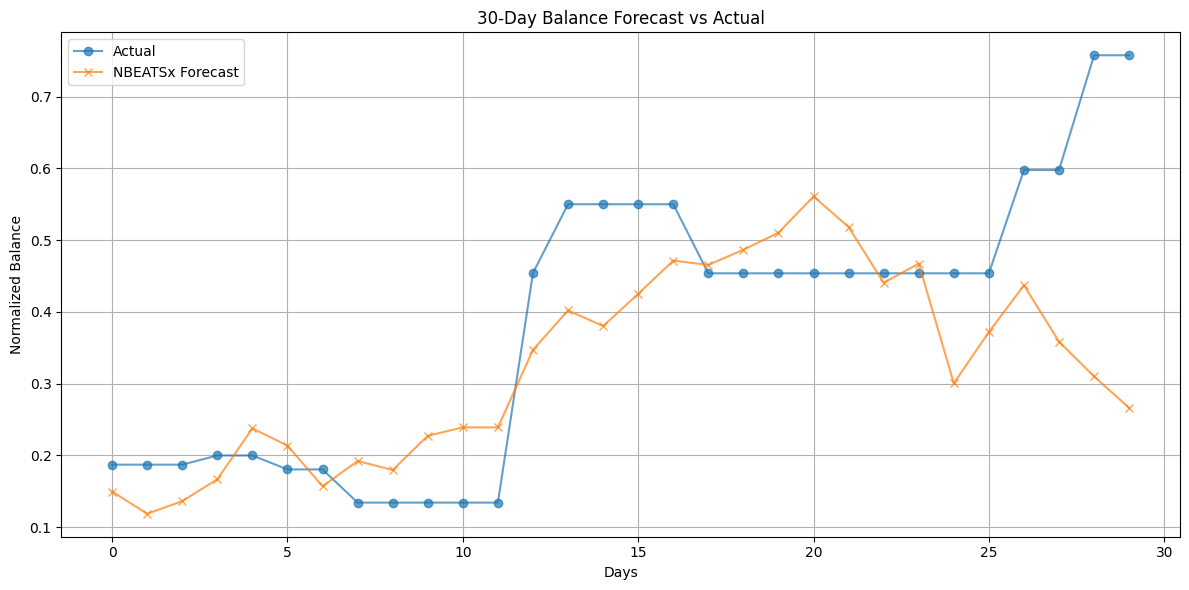

In [17]:
# Extract actual values and forecasts
actual = test_data['y'].iloc[:horizon].values
forecast = forecast_df.loc[forecast_df['unique_id'] == 'balance', 'NBEATSx'].values

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(horizon), actual, label='Actual', marker='o', alpha=0.7)
plt.plot(range(horizon), forecast, label='NBEATSx Forecast', marker='x', alpha=0.7)
plt.title('30-Day Balance Forecast vs Actual')
plt.xlabel('Days')
plt.ylabel('Normalized Balance')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Calculate error metrics
mae = mean_absolute_error(actual, forecast)
rmse = np.sqrt(mean_squared_error(actual, forecast))
# Add small epsilon to avoid division by zero in MAPE calculation
mape = np.mean(np.abs((actual - forecast) / (actual + 1e-8))) * 100

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.show()

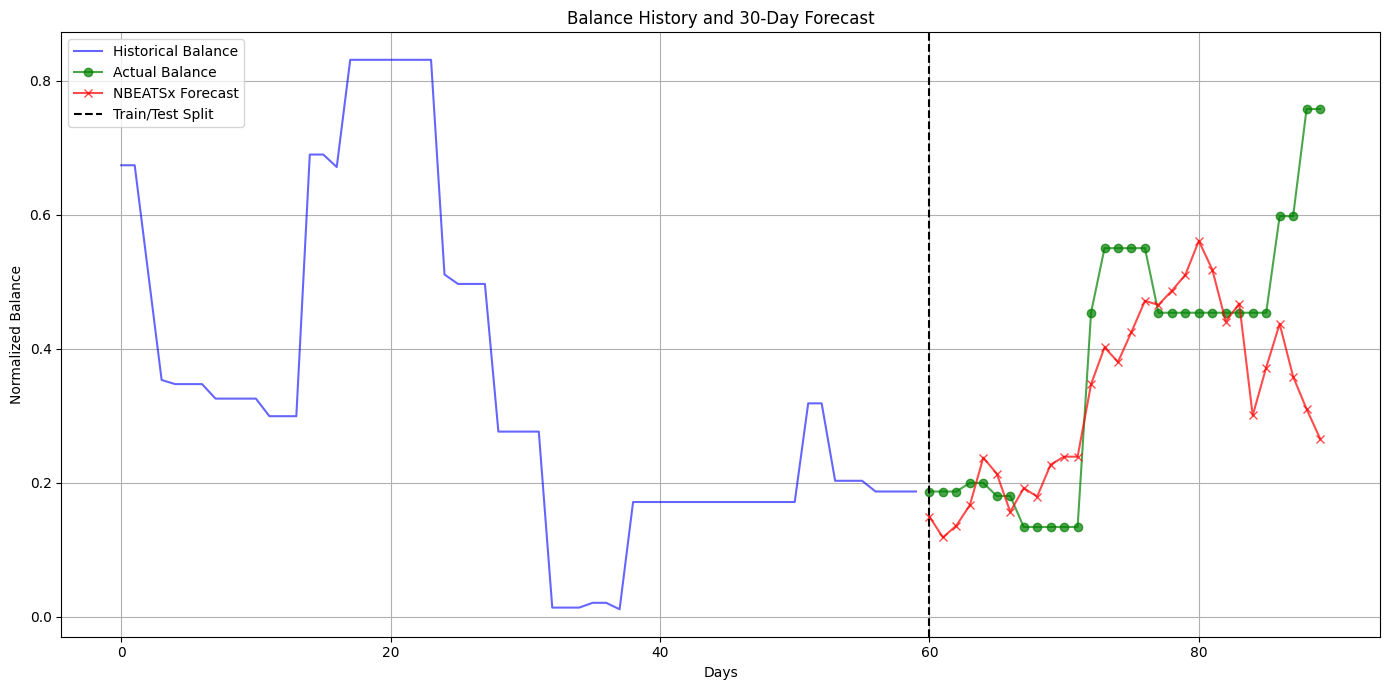

In [18]:
# Generate a more comprehensive visualization showing training history and forecast
# Take the last 60 days of training data for context
history_size = 60
historical_data = train_data.iloc[-history_size:]['y'].values
forecast_dates = range(history_size, history_size + horizon)
history_dates = range(history_size)

plt.figure(figsize=(14, 7))
# Plot historical data
plt.plot(history_dates, historical_data, label='Historical Balance', color='blue', alpha=0.6)
# Plot actual test data
plt.plot(forecast_dates, actual, label='Actual Balance', color='green', marker='o', alpha=0.7)
# Plot forecasted data
plt.plot(forecast_dates, forecast, label='NBEATSx Forecast', color='red', marker='x', alpha=0.7)
# Add vertical line to mark train/test split
plt.axvline(x=history_size, color='black', linestyle='--', label='Train/Test Split')

plt.title('Balance History and 30-Day Forecast')
plt.xlabel('Days')
plt.ylabel('Normalized Balance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
!jupyter nbconvert --ClearOutputPreprocessor.enabled=True --inplace cleaned_no_widgets.ipynb


[NbConvertApp] WARNING | pattern 'cleaned_no_widgets.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec